In [335]:
from bs4 import BeautifulSoup 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as sklearn_sw
import requests 
import string
import matplotlib.pyplot as plt
import matplotlib
import os 
import json
fig_dir = '../figs/'
data_dir = '../data/'
%matplotlib inline 

In [400]:
def get_titles(url, href_key):
    response = requests.get(url)
    html = response.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html.parser")
    links = soup.findAll('a', href=re.compile(href_key))
    titles = [link.string for link in links if link.string]
#     print(titles[:1])
    return titles 

def get_tokens(titles, custom_sw):
    punctuation = string.punctuation[:12] + string.punctuation[13:]
    stop_words = list(stopwords.words('english'))
    custom_sw += ['deep', 'learning', 'neural', 'networks','network', 'model', 'data', 'models', 'using', 'Training']
    custom_sw = [w.lower() for w in custom_sw]
    stop_words = set(stop_words + list(sklearn_sw) + custom_sw )
    tokens = []
    for i, title in enumerate(titles): 
        if not title: continue 
        title = title.translate(str.maketrans('', '', punctuation))
        tokens.extend(word_tokenize(title.lower()))
    tokens = [token.capitalize() for token in tokens if not token in stop_words]
    return tokens 

def get_word_freq(urls, href_key, custom_stop_words, key):
    titles = []
    for url in urls: 
        titles.extend(get_titles(url, href_key))
    titles = set(titles)
    file_name = os.path.join(data_dir, 'neurips_19_titles_'+key+'.txt')
    with open(file_name, 'w') as f:
        for title in titles: 
            f.write(title + '\n')
    tokens = get_tokens(titles, custom_stop_words)
    freqdist = nltk.FreqDist(tokens)
    file_name = os.path.join(data_dir, 'neurips_19_tokens_'+key+'.txt')
    with open(file_name, 'w') as f:
        for key, val in freqdist.items():
            f.write('%s\t%s\n' % (val,key))
    return freqdist

def plot_word_freq(freqdist, key):
    FONT_SIZE = 14
    plt.title('Token Frequencies')
    plt.xlabel('Counts')
    plt.grid(axis='y', alpha=0.75)
    ax = freqdist.plot(20, color='orange')
    plt.style.use('seaborn-bright')
    plt.rc('axes', labelsize=FONT_SIZE)
    plt.rc('xtick', labelsize=FONT_SIZE)    
    plt.rc('ytick', labelsize=FONT_SIZE)    
    plt.rc('axes', titlesize=FONT_SIZE)
    file_name = os.path.join(fig_dir, "neurips_19_"+key+".png")
    fig = ax.get_figure()
    fig.savefig(file_name, dpi=100)
    return ax

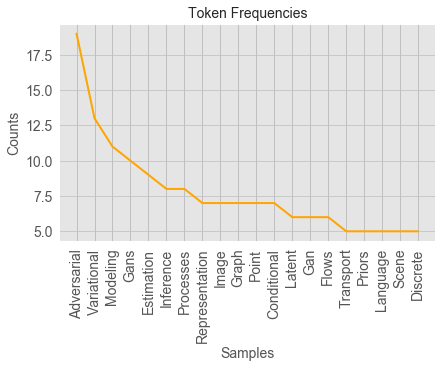

In [402]:
plt.style.use('seaborn-bright')
queries = ['Generative']    
urls = [base_url+'?text='+query for query in queries]
key = 'gan'

custom_stop_words = ['Generative', 'Generation']
freqdist = get_word_freq(urls, href_key, custom_stop_words, key)
ax=plot_word_freq(freqdist, key)

## Neurips General 

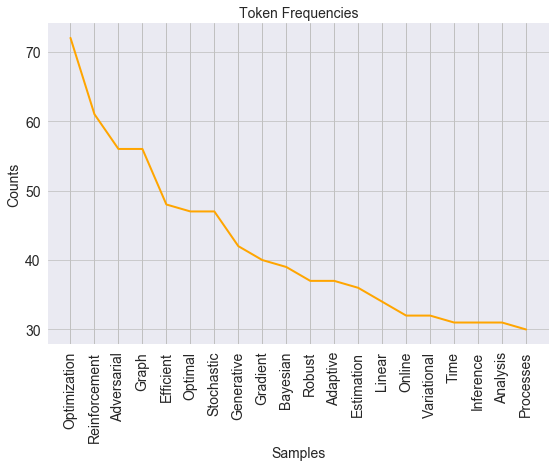

In [329]:
urls = ['https://papers.nips.cc/book/advances-in-neural-information-processing-systems-32-2019']
href_key = '/paper/'
key = 'general'

custom_stop_words = []
freqdist = get_word_freq(urls, href_key, custom_stop_words, key)
plot_word_freq(freqdist, key)

# Subject-wise analysis

In [331]:
base_url = 'https://nips.cc/Conferences/2019/ScheduleMultitrack'
href_key = '/Conferences/2019/ScheduleMultitrack\?event'

## NLP

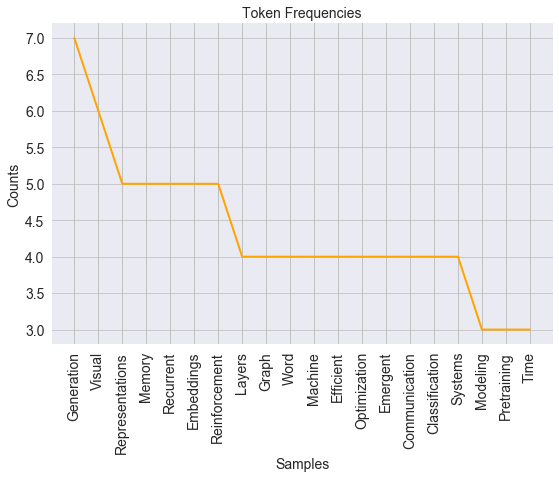

In [321]:
queries = ['natural+language+processing', 'language', 'nlp']    
urls = [base_url+'?text='+query for query in queries]
key = 'nlp'

custom_stop_words = ['Language', 'Natural', 'Processing', 'Text', 'Sequence' ]
freqdist = get_word_freq(urls, href_key, custom_stop_words, key)
plot_word_freq(freqdist, key)

## RL 

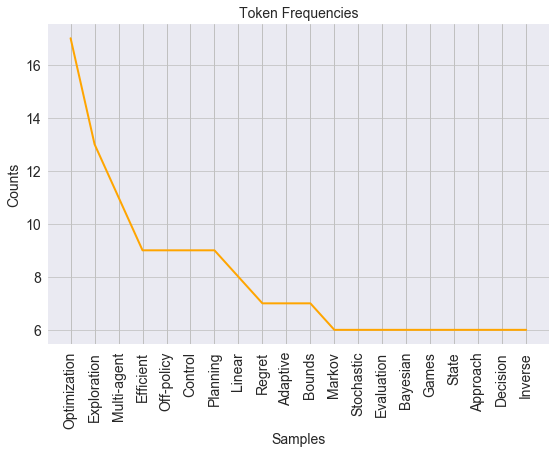

In [322]:
queries = ['reinforcement+learning']    
urls = [base_url+'?text='+query for query in queries]
key = 'rl'

custom_stop_words = ['Reinforcement', 'Policy', 'Function']
freqdist = get_word_freq(urls, href_key, custom_stop_words, key)
plot_word_freq(freqdist, key)

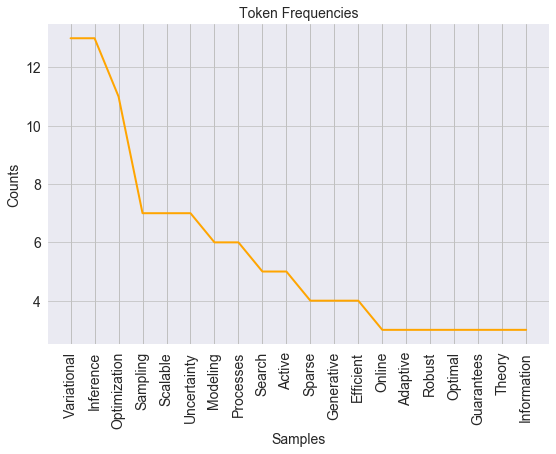

In [323]:
queries = ['Bayesian']    
urls = [base_url+'?text='+query for query in queries]
key = 'Bayesian'

custom_stop_words = ['Bayesian']
freqdist = get_word_freq(urls, href_key, custom_stop_words, key)
plot_word_freq(freqdist, key)

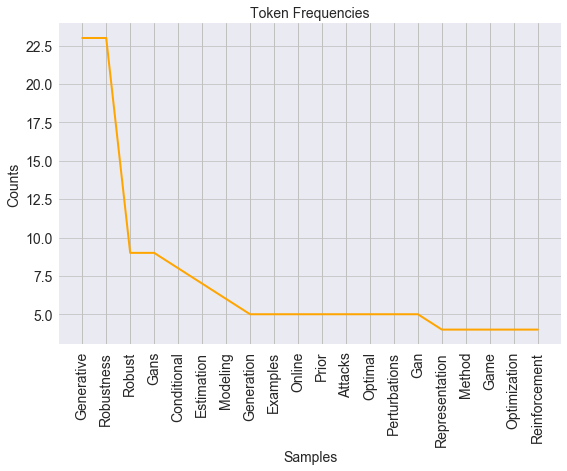

In [324]:
queries = ['Adversarial']    
urls = [base_url+'?text='+query for query in queries]
key = 'adv'

custom_stop_words = ['Adversarial']
freqdist = get_word_freq(urls, href_key, custom_stop_words, key)
plot_word_freq(freqdist, key)

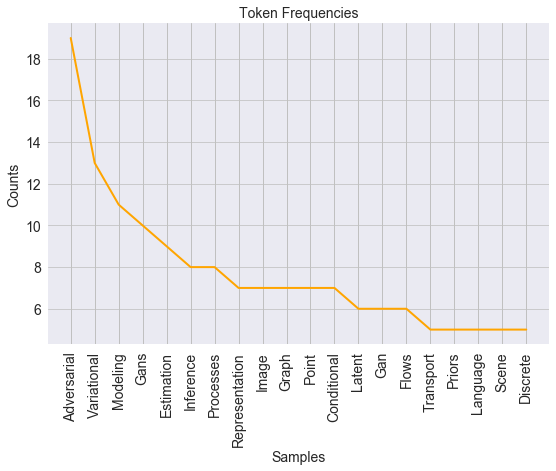

In [334]:
queries = ['Generative']    
urls = [base_url+'?text='+query for query in queries]
key = 'gan'

custom_stop_words = ['Generative', 'Generation']
freqdist = get_word_freq(urls, href_key, custom_stop_words, key)
plot_word_freq(freqdist, key)

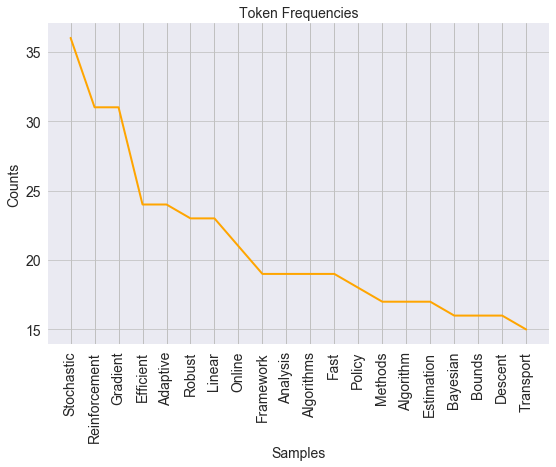

In [328]:
queries = ['Optimization', 'Optimal']    
urls = [base_url+'?text='+query for query in queries]
key = 'optimization'

custom_stop_words = ['Optimization', 'Optimal']
freqdist = get_word_freq(urls, href_key, custom_stop_words, key)
plot_word_freq(freqdist, key)

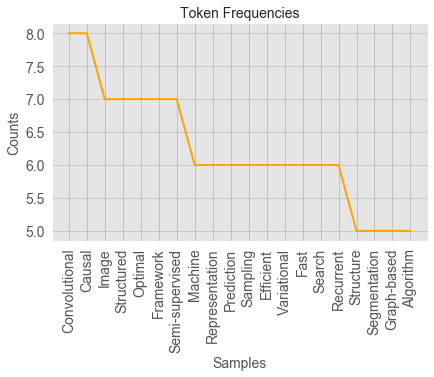

In [408]:
queries = ['graph', 'Graph+Nueral+Network']    
urls = [base_url+'?text='+query for query in queries]
key = 'graph'

custom_stop_words = ['Graph', 'Graphs']
freqdist = get_word_freq(urls, href_key, custom_stop_words, key)
plot_word_freq(freqdist, key)

In [406]:
urls

['https://nips.cc/Conferences/2019/ScheduleMultitrack?text=graph',
 'https://nips.cc/Conferences/2019/ScheduleMultitrack?text=Graph Nueral Networks']